In [159]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(1)
Gamma = 10

In [160]:
#load data
data = pd.read_excel('Data\Molding_Data.xlsx') #using pandas to load the excel file
data = data.dropna(axis=0, how='any') #drop nan from the data

# prepare variables and target
X = data.loc[:,['T_Mold','T_Melt','P_Gate','P_Runner']] #Variables, or using data.iloc[:,2:6]
Y = data.loc[:,'Part thickness'] # Target
X = X.to_numpy() #conver data frame to numpy array
Y = Y.to_numpy()

# data normalization, normalization to [0 1] range
X_Norm = np.empty_like(X)
for i in range(X.shape[1]):
   data_ = X[:,i]
   X_Norm[:,i] = (data_-np.amin(data_))/(np.amax(data_)-np.amin(data_)) 
    
# normalize Y data
Y_Min = np.amin(Y)
Y_Max = np.amax(Y)
Y_Norm = (Y-Y_Min)/(Y_Max-Y_Min)


In [161]:
# prepare variables and target

index = np.arange(len(Y))
np.random.shuffle(index) #disorder the original data

m = np.ceil(0.7*len(Y)) # 70% for training and 30% for testing
m = int(m) #covert float type to int type
X_Train = X_Norm[index[:m]]
Y_Train = Y_Norm[index[:m]]

X_Test = X_Norm[index[m:]]
Y_Test = Y_Norm[index[m:]]

# kernel transformation
import sklearn.metrics.pairwise as pw
X_Train_Kernel = pw.rbf_kernel(X_Train, X_Train, gamma = Gamma)
X_Test_Kernel = pw.rbf_kernel(X_Test, X_Train, gamma = Gamma)

In [162]:
# define loss function, Mean Square Error (MSE) + margin

def cost_function(X, Y, B):
    J = np.sum((X.dot(B)-Y)**2)/(2*len(Y))+ lamda * B.dot(B)  
    return J

In [163]:
# create iterative gradient descent training

def gradient_descent(X, Y, B, alpha, lamda, iterations):
    cost_history = np.zeros(iterations)
    
    for iteration in range(iterations):
        loss = X.dot(B) - Y
        gradient = X.T.dot(loss)/len(Y) + 2* lamda *B
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
    
    return B, cost_history

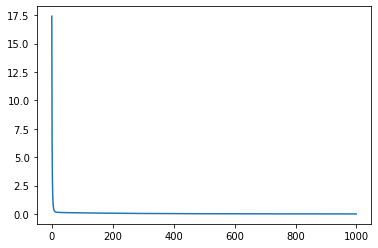

In [164]:
# training

B = np.random.random(X_Train_Kernel.shape[1]) # Initial Coefficients
alpha = 0.1 #learning rate
iter_ = 1000
lamda =  0.01 #1/iter_ #balancing coefficient
newB, cost_history = gradient_descent(X_Train_Kernel, Y_Train, B, alpha, lamda, iter_)

plt.plot(np.arange(iter_), cost_history)


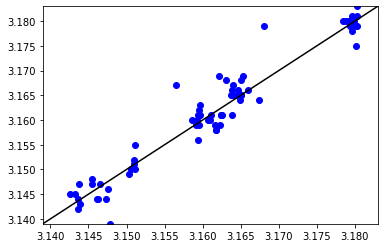

In [165]:
# testing 
y_predict = X_Test_Kernel.dot(newB)
y_predicted = y_predict * (Y_Max - Y_Min) + Y_Min
Y_Test = Y_Test * (Y_Max - Y_Min) + Y_Min
plt.scatter(y_predicted, Y_Test, c = 'b',marker = 'o')
plt.xlim(Y_Min, Y_Max)
plt.ylim(Y_Min, Y_Max)
plt.plot([Y_Min, Y_Max],[Y_Min, Y_Max],'k-')

In [166]:
# performance evaluation

def r2(y_predicted,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_predicted-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)

r2(y_predicted, Y_Test)

0.9334655887455852